In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.mlab as mlab
import glob
from scipy import optimize
from scipy.special import erf
import os

In [2]:
def find_nearest(array,value):
    idx = (np.abs(array-value)).argmin()
    return array[idx]

def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

In [3]:
cd /Users/austinmcdonald/Desktop/Xenon/Data/100/

/Users/austinmcdonald/Desktop/Xenon/Data/100


In [4]:
files = os.listdir()


In [5]:
Data = np.loadtxt(files[-1])

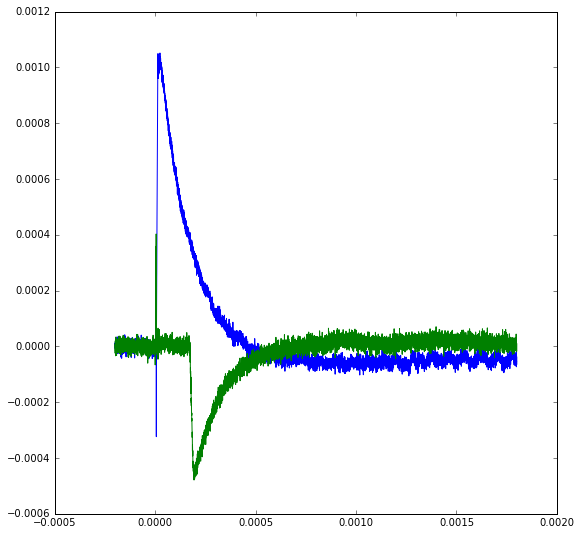

In [6]:
plt.figure(figsize=(9,9))
plt.plot(Data[0],Data[1])
plt.plot(Data[0],Data[2])

In [7]:
def FIND_MAX(X,Y):
    TriggerTime = find_nearest(X,0)
    Trigger     = np.where(X==TriggerTime)[0][0]+5
    xx = moving_average(X,20)
    yy = moving_average(Y,20)
    
    xxx = xx[Trigger:]
    yyy = yy[Trigger:]
    
    maxy = max(yyy)
    
    hold      = find_nearest(yyy,maxy)
    peak     = np.where(yyy==hold)[0][0]

    xxx = xx[Trigger:Trigger+peak]
    yyy = yy[Trigger:Trigger+peak]
    
    hold      = find_nearest(yyy,maxy*0.1)
    edge     = np.where(yyy==hold)[0][0]
    return Trigger+peak, Trigger+edge

def FIND_MIN(X,Y):
    TriggerTime = find_nearest(X,0)
    Trigger     = np.where(X==TriggerTime)[0][0]+20
    xx = moving_average(X,20)
    yy = moving_average(Y,20)
    
    xxx = xx[Trigger:]
    yyy = yy[Trigger:]
    
    miny = min(yyy)
    
    hold      = find_nearest(yyy,miny)
    MINLOC     = np.where(yyy==hold)[0][0]
    
    TT = Trigger+MINLOC
    xxxx = xx[Trigger:TT]
    yyyy = yy[Trigger:TT]
    
    hold      = find_nearest(yyyy,miny*0.1)
    REDGE     = np.where(yyyy==hold)[0][0]
    return MINLOC+Trigger,miny,REDGE+Trigger

0.00016920000197728793

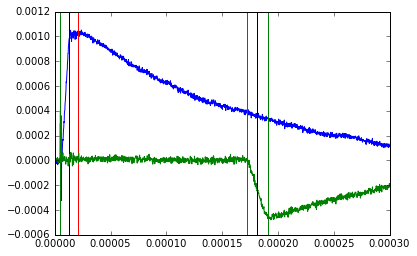

In [8]:
plt.plot(Data[0],Data[1])
pp,ee = FIND_MAX(Data[0],Data[1])
plt.axvline(Data[0][pp],color='r')
plt.axvline(Data[0][ee],color='g')
I = ee + int((pp-ee)/2)
plt.axvline(Data[0][I],color='k')

plt.plot(Data[0],Data[2])
MM, MIN, RE = FIND_MIN(Data[0],Data[2])
plt.axvline(Data[0][RE],color='r')
plt.axvline(Data[0][MM],color='g')
I2 = RE + int((MM-RE)/2)
plt.axvline(Data[0][I2],color='k')

plt.xlim(0,0.0003)

Data[0][I2]-Data[0][I]

In [9]:
np.sum(golF[-1e3:])

NameError: name 'golF' is not defined

//anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:8: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


RC = 0.000150520399687
a = 0.00130311903335


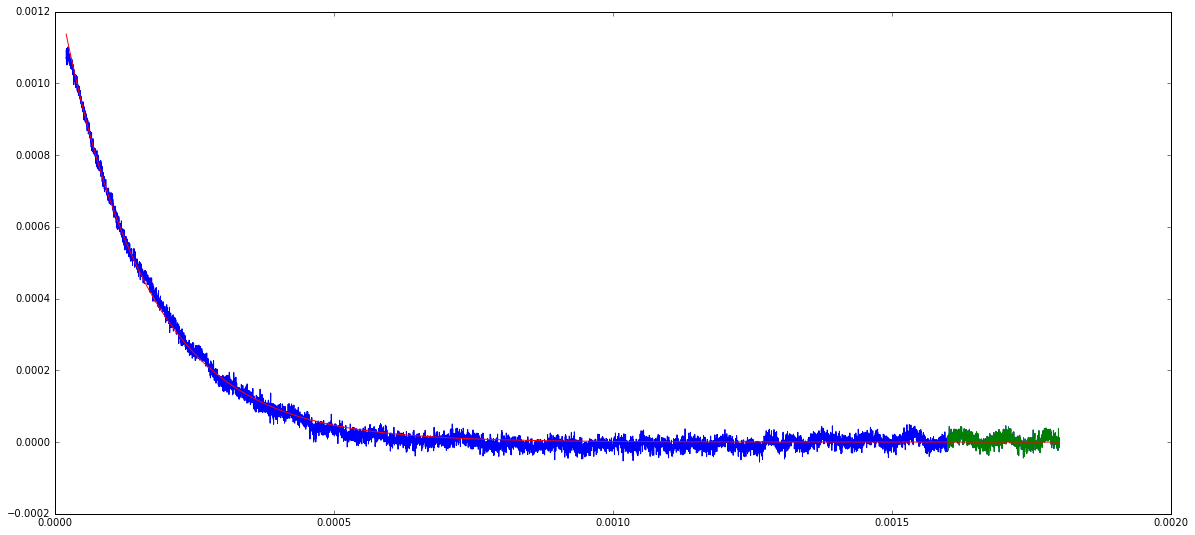

In [10]:
golF = Data[1][pp:]+0.00005
xxx = Data[0][pp:]

plt.figure(figsize=(20,9))
LL = len(golF)
#xxx = np.linspace(0,0.5,LL)
plt.plot(xxx,golF)
plt.plot(xxx[-1e3:],golF[-1e3:])


def func(x, a, tau):
    return a * np.exp(- x/tau) #+ c
popt, pcov = optimize.curve_fit(func, xxx, golF,p0=[0.001,100e-6])
plt.plot(xxx, func(xxx, *popt), 'r-', label="Fitted Curve")
print('RC =',popt[1])
print('a =',popt[0])

plt.show()

0.00016920000197728793

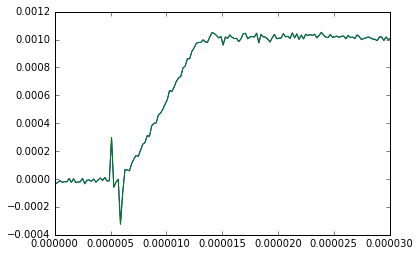

In [11]:
plt.plot(Data[0],Data[1])

TriggerTime = find_nearest(Data[0],0)
Trigger     = np.where(Data[0]==TriggerTime)[0][0]

plt.plot(Data[0][Trigger:],Data[1][Trigger:])

plt.xlim(0,0.00003)

Data[0][I2]-Data[0][I]

In [12]:
def func(t,t0,sig,a):
    tau = 150e-6
    A = (sig**2-2*(t-t0)*tau)/(2*tau**2)
    B = (-sig**2 +(t-t0)*tau)/(np.sqrt(2)*tau*sig)
    C = np.exp(A)
    D = (1 + erf(B))
    E = a*C*D
    return E

In [13]:
fitval = [0.00001,8e-6, 0.001]

#params, params_covariance = optimize.curve_fit(func, Data[0][Trigger:],Data[1][Trigger:],p0=fitval)
params, params_covariance = optimize.curve_fit(func, Data[0]-0.00001,Data[1],p0=fitval)

In [14]:
params

array([ -1.70899646e-08,   2.42116211e-06,   5.55641796e-04])

(-0.0001, 0.0005)

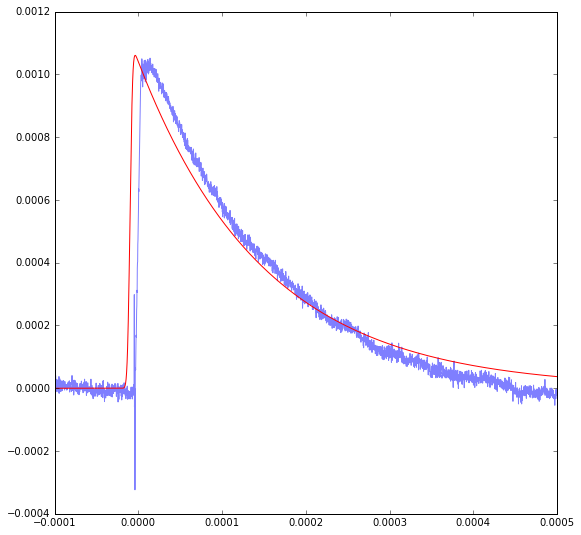

In [15]:
plt.figure(figsize=(9,9))
plt.plot(Data[0]-0.00001,Data[1],alpha=0.5)
#plt.plot(Data[0],func(Data[0], 1e-6, 0.0005))
plt.plot(Data[0]-0.00001,func(Data[0],*params),color='r')
plt.xlim(-0.0001,0.0005)

In [16]:
def func(t,t0,sig,a):
    tau = 150e-6
    A = (sig**2-2*(t-t0)*tau)/(2*tau**2)
    B = (-sig**2 +(t-t0)*tau)/(np.sqrt(2)*tau*sig)
    C = np.exp(A)
    D = (1 + erf(B))
    E = a*C*D
    return E

In [17]:
def func(t,t0,sig,a,tau):
    #tau = 150e-6
    A = (sig**2-2*(t-t0)*tau)/(2*tau**2)
    B = (-sig**2 +(t-t0)*tau)/(np.sqrt(2)*tau*sig)
    C = np.exp(A)
    D = (1 + erf(B))
    E = a*C*D
    return E

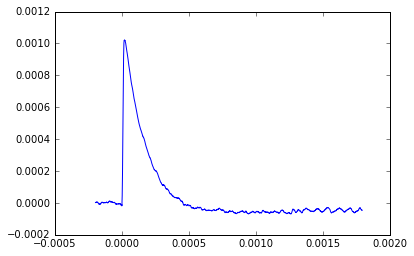

In [18]:
avg=50
YY = moving_average(Data[1],avg)
XX = moving_average(Data[0],avg)
plt.plot(XX,YY)

In [19]:
MM

1954

In [20]:
pp,ee = FIND_MAX(XX,YY)
I = ee + int((pp-ee)/2)
MM = max(YY[I:])
#plt.axvline(Data[0][I],color='k')

fitval = [XX[I],8e-6, MM,150e-6]

#params, params_covariance = optimize.curve_fit(func, Data[0][Trigger:],Data[1][Trigger:],p0=fitval)
params, params_covariance = optimize.curve_fit(func, XX,YY,p0=fitval)
params

array([  1.07791053e-05,   4.71033970e-06,   6.03875386e-04,
         1.29353689e-04])

In [54]:
fitval = [XX[I],8e-6, MM,150e-6]
# arrival, sigma, max, RC
errfunc = lambda p, x, y: (func(x, *p) - y)**2
optim, success = optimize.leastsq(errfunc, fitval, args=(XX,YY))
optim

array([  1.08138648e-05,   4.83120158e-06,   5.99740226e-04,
         1.27584433e-04])

In [55]:
success

1

(-0.0001, 0.001)

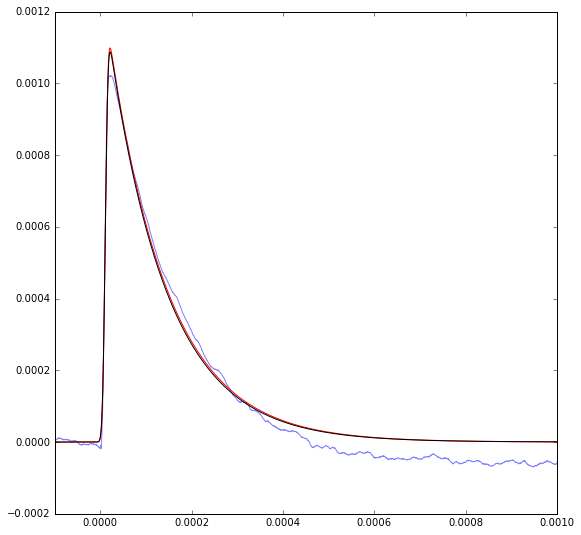

In [22]:
plt.figure(figsize=(9,9))
plt.plot(XX,YY,alpha=0.5)
#plt.plot(Data[0],func(Data[0], 1e-6, 0.0005))
plt.plot(XX,func(XX,*params),color='r')
plt.plot(XX,func(XX,*optim),color='k')

plt.xlim(-0.0001,0.001)

In [23]:
def FITTER_GOLD(x,y):
    avg=50
    YY = moving_average(y,avg)
    XX = moving_average(x,avg)
    pp,ee = FIND_MAX(XX,YY)
    I = ee + int((pp-ee)/2)
    MM = max(YY[I:])
    
    fitval = [XX[I],8e-6, MM,150e-6]

    errfunc = lambda p, x, y: (func(x, *p) - y)**2
    optim, success = optimize.leastsq(errfunc, fitval, args=(XX,YY))
    return XX,YY,optim

NameError: name 'FITTER' is not defined

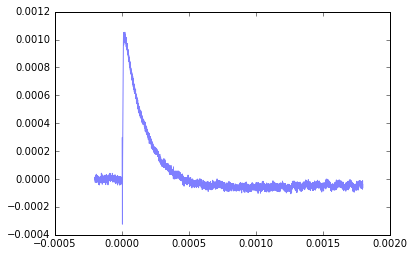

In [24]:
plt.plot(Data[0],Data[1],alpha=0.5)
X,Y,O = FITTER(Data[0],Data[1])
plt.plot(X,func(X,*O),color='r')


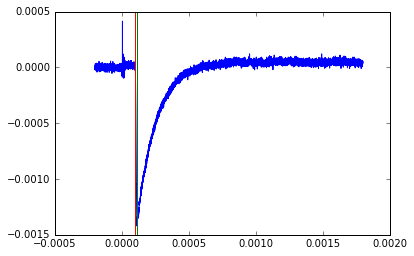

In [46]:
plt.plot(Data[0],Data[2])
MM, MIN, RE = FIND_MIN(Data[0],Data[2])
plt.axvline(Data[0][RE],color='r')
plt.axvline(Data[0][MM],color='g')
I2 = RE + int((MM-RE)/2)

In [49]:
Data[0][MM]-Data[0][RE]

1.1400000133221484e-05

In [71]:
def FITTER_ANOD(x,y):
    avg=50
    YY = moving_average(y,avg)
    XX = moving_average(x,avg)
    MM, MIN, RE = FIND_MIN(Data[0],Data[2])
    I2 = RE + int((MM-RE)/2)
    MM = min(YY[I2:])
    SIG = abs(x[MM]-x[RE])
    
    fitval = [XX[I],8e-6, MM,150e-6]
    #fitval = [XX[I],SIG, MM,150e-6]

    errfunc = lambda p, x, y: (func(x, *p) - y)**2
    optim, success = optimize.leastsq(errfunc, fitval, args=(XX,YY))
    return XX,YY,optim
    #return SIG

//anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:8: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


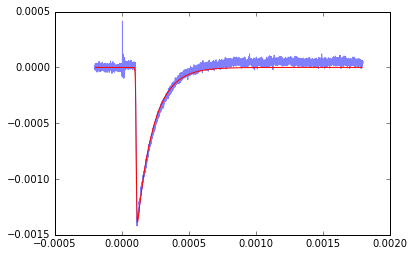

array([  1.08338350e-04,   4.54790607e-06,  -7.64115753e-04,
         1.22781274e-04])

In [72]:
plt.plot(Data[0],Data[2],alpha=0.5)
X,Y,O = FITTER_ANOD(Data[0],Data[2])
plt.plot(X,func(X,*O),color='r')
plt.show()
O

In [28]:
PATH = '/Users/austinmcdonald/Desktop/Xenon/Data/'
folders = glob.glob(PATH+"*/")
folders.sort()
folders

['/Users/austinmcdonald/Desktop/Xenon/Data/000/',
 '/Users/austinmcdonald/Desktop/Xenon/Data/002/',
 '/Users/austinmcdonald/Desktop/Xenon/Data/003/',
 '/Users/austinmcdonald/Desktop/Xenon/Data/008/',
 '/Users/austinmcdonald/Desktop/Xenon/Data/015/',
 '/Users/austinmcdonald/Desktop/Xenon/Data/035/',
 '/Users/austinmcdonald/Desktop/Xenon/Data/050/',
 '/Users/austinmcdonald/Desktop/Xenon/Data/065/',
 '/Users/austinmcdonald/Desktop/Xenon/Data/085/',
 '/Users/austinmcdonald/Desktop/Xenon/Data/095/',
 '/Users/austinmcdonald/Desktop/Xenon/Data/099/',
 '/Users/austinmcdonald/Desktop/Xenon/Data/100/',
 '/Users/austinmcdonald/Desktop/Xenon/Data/35-S/']

In [29]:
folders = [folders[0],folders[1],folders[3],folders[4],folders[10],folders[11],folders[12]]
folders

['/Users/austinmcdonald/Desktop/Xenon/Data/000/',
 '/Users/austinmcdonald/Desktop/Xenon/Data/002/',
 '/Users/austinmcdonald/Desktop/Xenon/Data/008/',
 '/Users/austinmcdonald/Desktop/Xenon/Data/015/',
 '/Users/austinmcdonald/Desktop/Xenon/Data/099/',
 '/Users/austinmcdonald/Desktop/Xenon/Data/100/',
 '/Users/austinmcdonald/Desktop/Xenon/Data/35-S/']

In [30]:
files = os.listdir(folders[0])
files

['Xe-000_P-01_E-060.txt',
 'Xe-000_P-11_E-150.txt',
 'Xe-000_P-01_E-100.txt',
 'Xe-000_P-09_E-080.txt',
 'Xe-000_P-03_E-150.txt',
 'Xe-000_P-06_E-200.txt',
 'Xe-000_P-09_E-150.txt',
 'Xe-000_P-03_E-080.txt',
 'Xe-000_P-01_E-200.txt',
 'Xe-000_P-11_E-080.txt',
 'Xe-000_P-06_E-100.txt',
 'Xe-000_P-03_E-100.txt',
 'Xe-000_P-09_E-200.txt',
 'Xe-000_P-06_E-080.txt',
 'Xe-000_P-11_E-100.txt',
 'Xe-000_P-11_E-060.txt',
 'Xe-000_P-01_E-150.txt',
 'Xe-000_P-01_E-080.txt',
 'Xe-000_P-06_E-150.txt',
 'Xe-000_P-03_E-200.txt',
 'Xe-000_P-09_E-100.txt',
 'Xe-000_P-11_E-200.txt']

In [31]:
# arrival, sigma, max, RC


In [32]:
Gold=[]
for x in range(0,len(files)):
    Data = np.loadtxt(folders[0]+files[x])
    X,Y,O = FITTER_GOLD(Data[0],Data[1])
    Gold.append(O)

In [33]:
Gold = np.array(Gold)

In [44]:
Gold[:,3]

array([ 0.00011867,  0.00012537,  0.00012154,  0.0001205 ,  0.00012344,
        0.00012607,  0.00012419,  0.00012062,  0.00012208,  0.00012027,
        0.00012143,  0.00012272,  0.00012325,  0.00012133,  0.00012274,
        0.00011973,  0.00012065,  0.00012118,  0.00012391,  0.00012517,
        0.00012118,  0.00012598])

In [38]:
ANOD=[]
for x in range(0,len(files)):
    Data = np.loadtxt(folders[0]+files[x])
    X,Y,O = FITTER_ANOD(Data[0],Data[2])
    ANOD.append(O)
ANOD = np.array(ANOD)

In [45]:
ANOD[:,3]

array([ 0.00012183,  0.00012287,  0.00012899,  0.00012453,  0.00012747,
        0.00012303,  0.00012009,  0.00012533,  0.00012571,  0.00012979,
        0.00012222,  0.00012291,  0.00012184,  0.00011979,  0.00011483,
        0.00012585,  0.00013051,  0.00013237,  0.00012739,  0.00012483,
        0.00012315,  0.00012278])

In [41]:
(ANOD[:,0]-Gold[:,0])*1e6

array([  73.66493022,  108.23673896,   64.58048495,  120.75897952,
         76.09368616,   84.74223305,  102.35563411,   90.0795402 ,
         55.07830604,  126.68553111,  101.94434374,   84.89009254,
         94.59685156,  108.38803666,  120.22055923,  135.61315787,
         58.70751694,   68.30573149,   91.44069134,   70.66359302,
        113.91789593,   99.92214879])

In [ ]:
Data = np.loadtxt(folders[0]+files[x])
X,Y,O = FITTER_GOLD(Data[0],Data[1])
X,Y,O = FITTER_ANOD(Data[0],Data[1])
#Gold.append(O)